### Un ejemplo práctico

La clase <code>word2vec</code> de Gensim permite word embeddings de palabras (ver documentación: https://radimrehurek.com/gensim/models/word2vec.html).

Esta clase tiene varios parametros, en particular:
- <code>sentences</code>: una lista de palabras o de frases que sirve para entrenar el modelo
- <code>sg</code>: define que algoritmos de aprendizaje utilizar (0=CBOW, 1=skip-gram)
- <code>hs</code>: define la función objetivo en el algoritmo de entrenamiento (1 para softmax jerárquico y 0 para negative sampling)
- <code>size</code>: define la dimensión de los vectores que se desea extraer
- <code>window</code>: define el número de palabras a considerar a la izquierda y a la derecha de una palabra
- <code>min_count</code>: ignorar las palabras que aparecen menos de _min_count_
y otros asociados a la parametrización de la fase de aprendizaje de la red neuronal (que no detallaremos en esta parte del curso):
- <code>alpha</code>: el _learning rate_ utilizado para optimizar los parametros de la red neuronal.
- <code>iter</code>: número de iteraciones (épocas) sobre el dataset para encontrar los parámetros que optimizan la red neuronal.

In [2]:
from gensim.models import word2vec

Para entrenar nuestro modelo Word2Vec, podemos utilizar nuestros propios datasets o utilizar datasets genericos existentes. Para empezar, utilizaremos 100 MB de textos extraidos de Wikipedia en inglés, para generar vectores de 200 dimensiones.

In [3]:
sentences = word2vec.Text8Corpus("data/text8.txt")

In [12]:
model = word2vec.Word2Vec(sentences, window=5, size=200, hs=1)
#model=word2vec.Word2Vec.load("text8_model")

In [13]:
print(model)

Word2Vec(vocab=71290, size=200, alpha=0.025)


In [14]:
model.wv.most_similar(positive=['woman','king'],negative=['man'],topn=5)

[('queen', 0.5622705817222595),
 ('empress', 0.5470137000083923),
 ('prince', 0.5057038068771362),
 ('princess', 0.4989817142486572),
 ('regent', 0.4976450204849243)]

In [15]:
model.wv.most_similar(positive=["conflict"])

[('conflicts', 0.682414174079895),
 ('clashes', 0.682171642780304),
 ('confrontation', 0.6626074910163879),
 ('struggle', 0.6328846216201782),
 ('tensions', 0.6276190280914307),
 ('hostilities', 0.614619255065918),
 ('dispute', 0.6022558808326721),
 ('strife', 0.5926722288131714),
 ('confrontations', 0.5895695686340332),
 ('frictions', 0.5696279406547546)]

In [16]:
model.wv.most_similar(positive=["conflict","weapon"])

[('confrontation', 0.6195418834686279),
 ('warfare', 0.5241535902023315),
 ('pistol', 0.5239875912666321),
 ('combat', 0.5101107358932495),
 ('struggle', 0.508881151676178),
 ('threat', 0.4916025698184967),
 ('fighting', 0.4896182715892792),
 ('weapons', 0.48859667778015137),
 ('assault', 0.48665469884872437),
 ('warheads', 0.47178226709365845)]

In [17]:
model.wv.most_similar(positive=["conflict"],negative=["weapon"])

[('clashes', 0.5029101371765137),
 ('conflicts', 0.5026495456695557),
 ('disagreements', 0.4749498665332794),
 ('disputes', 0.46413397789001465),
 ('tensions', 0.4494709372520447),
 ('strife', 0.4385940134525299),
 ('dispute', 0.4342709183692932),
 ('hostilities', 0.42842239141464233),
 ('antagonism', 0.41564685106277466),
 ('intermarriage', 0.4140060544013977)]

In [18]:
model.wv.most_similar(positive=["life"])

[('childhood', 0.5393344163894653),
 ('career', 0.4845719337463379),
 ('experiences', 0.4679872989654541),
 ('lives', 0.4625600576400757),
 ('humanity', 0.45399612188339233),
 ('teens', 0.4534773826599121),
 ('adolescence', 0.4498787522315979),
 ('genius', 0.4421176314353943),
 ('mankind', 0.43157845735549927),
 ('experience', 0.42014050483703613)]

In [19]:
model.wv.most_similar(positive=["life"],negative=["money"])

[('childhood', 0.3865353465080261),
 ('adolescence', 0.35526561737060547),
 ('experiences', 0.3413849472999573),
 ('recounting', 0.32278770208358765),
 ('career', 0.31851351261138916),
 ('rebirth', 0.31040826439857483),
 ('jubal', 0.31005650758743286),
 ('personality', 0.3037562966346741),
 ('eschatology', 0.30316799879074097),
 ('allegory', 0.3019787073135376)]

Ver los parametros aprendidos por la red neuronal para una palabra dada:

In [20]:
model.wv['computer']

array([-1.5159079 ,  0.80214715,  0.276939  , -1.3597016 ,  1.5235054 ,
        0.14684658,  1.2048116 ,  1.9749167 , -0.46864378, -0.1929496 ,
       -0.4290154 , -0.48530078,  0.75490105,  0.8892544 ,  1.5673723 ,
        0.24747702,  0.5400999 ,  0.60588485, -0.5401709 , -1.004351  ,
        0.64437366,  0.57947695,  0.28270513, -1.0196301 ,  0.19514811,
       -0.15655258, -1.1349854 , -0.03052247, -1.5594072 ,  0.0469866 ,
       -0.859875  , -0.66888624,  2.6631389 ,  1.6573238 ,  0.6539812 ,
        1.932349  ,  0.08899866,  1.0110847 ,  0.29487696,  0.81247514,
        0.24700445,  1.3175786 ,  1.601303  ,  0.19008061,  0.7870314 ,
        1.0534837 ,  0.15557097, -0.3045088 , -0.9566997 , -0.00801399,
        1.6332164 , -0.13534842, -1.0952069 , -0.80700034, -0.36430326,
       -0.45601684, -2.8792374 ,  1.4524796 , -0.9105639 ,  1.0402459 ,
       -0.62348187, -0.1261368 , -0.98406065, -1.4223725 , -2.2433648 ,
       -0.0547363 ,  0.66124845, -1.2484993 ,  0.05282079, -0.34

Guardar el modelo:

In [21]:
model.save("text8_model")
model=word2vec.Word2Vec.load("text8_model")

In [25]:
model.wv.doesnt_match("breakfast cereal dinner lunch".split())

'cereal'

In [26]:
model.wv.doesnt_match("brazil chile france peru argentina".split())

'france'

In [27]:
model.wv.doesnt_match("apple pear banana hammer".split())

'apple'

In [28]:
model.wv.similarity('man','woman')

0.64086884

In [29]:
model.wv.similarity('man','hammer')

0.2513813

In [30]:
model.wv.similarity('woman','hammer')

0.16365528

In [31]:
model.wv.similarity('man','engineer')

0.08627574

In [32]:
model.wv.similarity('woman','engineer')

0.071929134

In [33]:
model.wv.similarity('man','baby')

0.31784666

In [34]:
model.wv.similarity('woman','baby')

0.43885893

**Pregunta 1:** modifique parámetros de entrenamiento y compare resultados con los obtenidos previamente.

### Cargar un modelo Word2Vec pre-entrenado para el español

ver: https://github.com/dccuchile/spanish-word-embeddings

In [35]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format("data/SBW-vectors-300-min5.bin.gz", binary=True) 

In [36]:
dog = model['perro']
print(dog.shape)
print(dog[:10])

(300,)
[ 0.1051706  -0.27460352 -0.21322592  0.261666    0.09946854 -0.02449877
  0.12955804 -0.34066245  0.3385692  -0.09923615]


In [37]:
print(model.similarity('mujer', 'ingeniería'))
print(model.similarity('hombre', 'ingenieria'))

0.12951772
0.15265214


In [38]:
print(model.similarity('mujer', 'bebe'))
print(model.similarity('hombre', 'bebe'))

0.4396093
0.40620732


In [39]:
print(model.similarity('chileno', 'violencia'))
print(model.similarity('venezolano', 'violencia'))
print(model.similarity('francés', 'violencia'))

0.1600553
0.20306623
0.13652363


In [40]:
print(model.similarity('chileno', 'criminal'))
print(model.similarity('venezolano', 'criminal'))
print(model.similarity('francés', 'criminal'))

0.17682078
0.19584653
0.10330092


In [41]:
model.most_similar(positive=["chileno"],topn=20)

[('chilena', 0.7700597047805786),
 ('Chile', 0.7495903968811035),
 ('peruano', 0.7162680625915527),
 ('chilenos', 0.7058152556419373),
 ('Chileno', 0.7000812292098999),
 ('argentino', 0.6901670098304749),
 ('boliviano', 0.668327808380127),
 ('Antofagasta', 0.6591013669967651),
 ('Talca', 0.6463865041732788),
 ('ecuatoriano', 0.6427898406982422),
 ('ariqueño', 0.6422775983810425),
 ('chilenas', 0.6416401267051697),
 ('Valparaíso', 0.6410984396934509),
 ('Pavez', 0.639731764793396),
 ('penquista', 0.6381477117538452),
 ('Iturra', 0.6330534219741821),
 ('Iquique', 0.6310880184173584),
 ('nortino', 0.6273276209831238),
 ('iquiqueño', 0.627190113067627),
 ('Temuco', 0.6224685311317444)]

## Ejemplo práctico de análisis con ETM

Usaremos los mismos datos de ejemplo que en las sesiones anteriores usando una biblioteca que implementa ETM (ver https://github.com/lffloyd/embedded-topic-model)

In [46]:
import pandas as pd
#from pandasql import sqldf #para utilizar una síntaxis SQL para consultar nuestros datos

dataset="data/contaminaciónacústica_chile_2018-01-01_2021-12-31.csv"
df = pd.read_csv(dataset)

noticias = df[:88].text

In [47]:
import spacy
nlp = spacy.load("es_core_news_md")

def spacy_tokenizer(texto):
    # crea lista de tokens a partir de un texto
    mytokens = []
    doc = nlp(texto.lower().strip())
    for token in doc:
        if not token.is_stop and not token.is_punct and not token.is_space and not token.is_digit and not token.like_num:
            mytokens.append(token.lemma_)
    return mytokens


In [50]:
import re
from sklearn.feature_extraction.text import CountVectorizer
myStopWords=['gnl','=','$','+','a','e','o','u','y',' ','  ','   ','    ']
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                stop_words=myStopWords,tokenizer=spacy_tokenizer, ngram_range=(1,1))
tf = tf_vectorizer.fit_transform(noticias)
diccionario= tf_vectorizer.get_feature_names()

In [56]:
#preparando los datos para su análisis y visualización
import numpy as np
td= {'tokens':[],'counts':[]}
doc_l = np.zeros(len(noticias))
term_f= np.zeros(len(diccionario))
for i in range(0,len(noticias)):
        tok=[]
        cou=[]
        for j in range(0,len(diccionario)):
             if(tf[i,j]>=1):
                term_f[j] = term_f[j] + tf[i,j]
                doc_l[i] = doc_l[i]+ tf[i,j]
                tok.append(j)
                cou.append(tf[i,j])
        td['tokens'].append(np.array(tok))
        td['counts'].append(np.array(cou))
td['tokens']= np.array(td['tokens'],dtype=object)
td['counts']= np.array(td['counts'],dtype=object)

In [57]:
from embedded_topic_model.models.etm import ETM
# Training an ETM instance

true_k=3
etm_instance = ETM(
    diccionario,
    embeddings=model, # You can pass here the path to a word2vec file or
                                   # a KeyedVectors instance
    num_topics=true_k,
    epochs=300,
    debug_mode=True,
    train_embeddings=False, # Optional. If True, ETM will learn word embeddings jointly with
                            # topic embeddings. By default, is False. If 'embeddings' argument
                            # is being passed, this argument must not be True
)

etm_instance.fit(td)

Topics before training: [['ruido\x94', 'naomi', '10:00', '1.0}.200', '.css({visibility:"visible', '0.0}).animate({opacity', '\x93son', 'entregar él', 'v-629', 'casin'], ['http://estaticos.24horas.cl/skins/2017/06/16/player/css/jw24horas.css?v=v24-05-2017', 'chaitén', 'alimentar él', 'lipiga', 'w620h350', 'amigabl', '.storyvideobody', 'irarrázabal', 'minvu', 'brennar'], ['70%', 'decir él', 'ee.uu', 'sustentabl', 'alternates', 'u.', '.css({visibility:"visible', 'aysén', '\x93es', 'macer']]
Epoch 1 - Learning Rate: 0.005 - KL theta: 0.0 - Rec loss: 1824.51 - NELBO: 1824.51
Epoch 2 - Learning Rate: 0.005 - KL theta: 0.04 - Rec loss: 1820.77 - NELBO: 1820.81
Epoch 3 - Learning Rate: 0.005 - KL theta: 0.15 - Rec loss: 1817.62 - NELBO: 1817.77
Epoch 4 - Learning Rate: 0.005 - KL theta: 0.2 - Rec loss: 1815.05 - NELBO: 1815.25
Epoch 5 - Learning Rate: 0.005 - KL theta: 0.15 - Rec loss: 1812.18 - NELBO: 1812.33
Epoch 6 - Learning Rate: 0.005 - KL theta: 0.11 - Rec loss: 1809.68 - NELBO: 1809.79

Epoch 66 - Learning Rate: 0.005 - KL theta: 3.74 - Rec loss: 1729.79 - NELBO: 1733.53
Epoch 67 - Learning Rate: 0.005 - KL theta: 3.79 - Rec loss: 1729.77 - NELBO: 1733.56
Epoch 68 - Learning Rate: 0.005 - KL theta: 4.07 - Rec loss: 1728.83 - NELBO: 1732.9
Epoch 69 - Learning Rate: 0.005 - KL theta: 4.35 - Rec loss: 1728.14 - NELBO: 1732.49
Epoch 70 - Learning Rate: 0.005 - KL theta: 4.5 - Rec loss: 1727.72 - NELBO: 1732.22
Topics: [['ballena', 'especie', 'marino', 'área', 'región', 'población', 'mamífero', 'marina', 'ave', 'cetáceo'], ['ruido', 'nivel', 'db', 'ambiente', 'sonido', 'población', 'impacto', 'generar', 'polución', 'alto'], ['proyecto', 'municipio', 'parque', 'municipal', 'empresa', 'sector', 'carretera', 'metropolitano', 'comunidad', 'vehículo']]
Epoch 71 - Learning Rate: 0.005 - KL theta: 4.38 - Rec loss: 1727.1 - NELBO: 1731.48
Epoch 72 - Learning Rate: 0.005 - KL theta: 4.03 - Rec loss: 1727.23 - NELBO: 1731.26
Epoch 73 - Learning Rate: 0.005 - KL theta: 3.63 - Rec los

Epoch 135 - Learning Rate: 0.005 - KL theta: 3.69 - Rec loss: 1713.74 - NELBO: 1717.43
Epoch 136 - Learning Rate: 0.005 - KL theta: 3.77 - Rec loss: 1713.68 - NELBO: 1717.45
Epoch 137 - Learning Rate: 0.005 - KL theta: 3.88 - Rec loss: 1713.74 - NELBO: 1717.62
Epoch 138 - Learning Rate: 0.005 - KL theta: 3.96 - Rec loss: 1713.32 - NELBO: 1717.28
Epoch 139 - Learning Rate: 0.005 - KL theta: 4.0 - Rec loss: 1713.18 - NELBO: 1717.18
Epoch 140 - Learning Rate: 0.005 - KL theta: 3.95 - Rec loss: 1713.26 - NELBO: 1717.21
Topics: [['ballena', 'especie', 'agua', 'marino', 'área', 'región', 'mamífero', 'delfín', 'humedal', 'población'], ['ruido', 'nivel', 'ambiente', 'ambiental', 'impacto', 'persona', 'salud', 'ciudad', 'lugar', 'generar'], ['proyecto', 'público', 'empresa', 'parque', 'sector', 'transporte', 'servicio', 'vehículo', 'año', 'vecino']]
Epoch 141 - Learning Rate: 0.005 - KL theta: 3.89 - Rec loss: 1713.35 - NELBO: 1717.24
Epoch 142 - Learning Rate: 0.005 - KL theta: 3.92 - Rec loss

Epoch 207 - Learning Rate: 0.005 - KL theta: 3.35 - Rec loss: 1709.68 - NELBO: 1713.03
Epoch 208 - Learning Rate: 0.005 - KL theta: 3.47 - Rec loss: 1708.96 - NELBO: 1712.43
Epoch 209 - Learning Rate: 0.005 - KL theta: 3.71 - Rec loss: 1709.06 - NELBO: 1712.77
Epoch 210 - Learning Rate: 0.005 - KL theta: 3.89 - Rec loss: 1708.59 - NELBO: 1712.48
Topics: [['ballena', 'especie', 'agua', 'marino', 'región', 'mamífero', 'área', 'población', 'chile', 'delfín'], ['ruido', 'nivel', 'ambiental', 'ambiente', 'persona', 'ciudad', 'impacto', 'salud', 'lugar', 'generar'], ['proyecto', 'público', 'empresa', 'parque', 'año', 'transporte', 'vecino', 'servicio', 'vehículo', 'sector']]
Epoch 211 - Learning Rate: 0.005 - KL theta: 3.95 - Rec loss: 1708.75 - NELBO: 1712.7
Epoch 212 - Learning Rate: 0.005 - KL theta: 3.98 - Rec loss: 1708.79 - NELBO: 1712.77
Epoch 213 - Learning Rate: 0.005 - KL theta: 4.21 - Rec loss: 1708.26 - NELBO: 1712.47
Epoch 214 - Learning Rate: 0.005 - KL theta: 4.34 - Rec loss: 

Epoch 280 - Learning Rate: 0.005 - KL theta: 4.12 - Rec loss: 1706.27 - NELBO: 1710.39
Topics: [['ballena', 'especie', 'agua', 'marino', 'región', 'mamífero', 'área', 'chile', 'ave', 'población'], ['ruido', 'nivel', 'ambiental', 'persona', 'ambiente', 'ciudad', 'salud', 'impacto', 'lugar', 'generar'], ['proyecto', 'público', 'empresa', 'parque', 'año', 'transporte', 'vecino', 'servicio', 'vehículo', 'sector']]
Epoch 281 - Learning Rate: 0.005 - KL theta: 3.95 - Rec loss: 1706.9 - NELBO: 1710.85
Epoch 282 - Learning Rate: 0.005 - KL theta: 3.92 - Rec loss: 1706.58 - NELBO: 1710.5
Epoch 283 - Learning Rate: 0.005 - KL theta: 3.91 - Rec loss: 1706.44 - NELBO: 1710.35
Epoch 284 - Learning Rate: 0.005 - KL theta: 3.94 - Rec loss: 1706.38 - NELBO: 1710.32
Epoch 285 - Learning Rate: 0.005 - KL theta: 3.99 - Rec loss: 1706.61 - NELBO: 1710.6
Epoch 286 - Learning Rate: 0.005 - KL theta: 3.92 - Rec loss: 1706.45 - NELBO: 1710.37
Epoch 287 - Learning Rate: 0.005 - KL theta: 3.72 - Rec loss: 1706.

In [60]:
## extrayendo resultados del análisis de tópicos
topics = etm_instance.get_topics(20)
dist = etm_instance.get_document_topic_dist()
d_topic = etm_instance.get_topic_word_dist()

##creando las entradas para visualización
true_k=3
nDoc = len(noticias)
nVocab = len(diccionario)
dist_doc = np.array(dist).reshape(nDoc,true_k)
dist_topic= np.array(d_topic).reshape(true_k,nVocab)

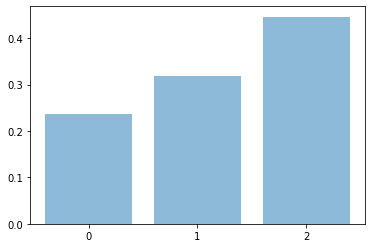

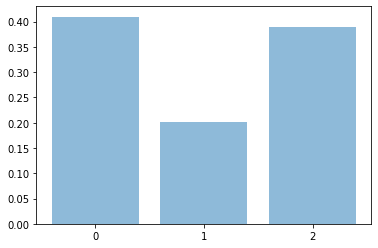

[0.011962982, 0.01092345, 0.009252143, 0.007455112, 0.0069499193, 0.0062935185, 0.0059089973, 0.005692062, 0.0056336075, 0.005283099, 0.005253847, 0.005229361, 0.0050471644, 0.005009583, 0.004640441]


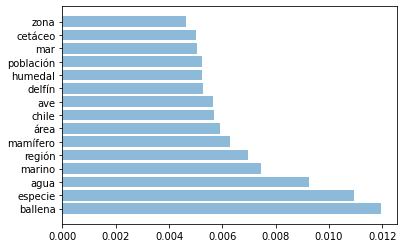

[0.031449847, 0.011978708, 0.011803053, 0.008188019, 0.0080342665, 0.007870421, 0.00677031, 0.00657051, 0.0063015865, 0.0056341044, 0.005216094, 0.005030401, 0.004687439, 0.004663519, 0.004585781]


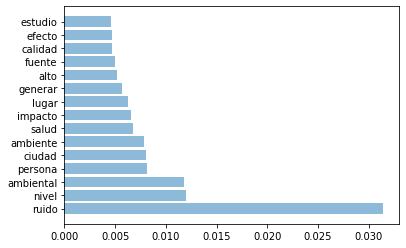

[0.0068700826, 0.006510831, 0.0059335353, 0.0049640746, 0.004726857, 0.004474035, 0.0044597876, 0.0042204573, 0.0041997493, 0.004078981, 0.0035647706, 0.0031625126, 0.0029043108, 0.0028947846, 0.0026419864]


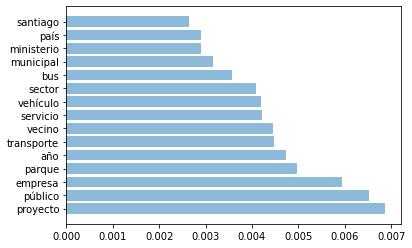

In [61]:
#Generando algunos gráficos de los resultados
from matplotlib.pylab import hist, show
import matplotlib.pyplot as plt
import numpy as np

dist_sum = sum(dist_doc)/nDoc
w=np.arange(0,true_k)
plt.bar(w,height=dist_sum,alpha=0.5,tick_label=w)
show()

#distribución de tópicos en el documento 100
plt.bar(w,height=dist_doc[51],alpha=0.5,tick_label=w)
show()

#frecuencia de palabras por tópico
n_top_words=15
numo =np.arange(0,n_top_words)

for idx,topic in enumerate(dist_topic):
    d =[]
    s = []
    for i in topic.argsort()[:-n_top_words - 1:-1]:
        s.append(diccionario[i])
        d.append(topic[i])
    print(d)
    
    plt.barh(numo,width=d,alpha=0.5,tick_label=s)
    show()



In [64]:
import pyLDAvis
prepared = pyLDAvis.prepare(doc_lengths = doc_l,
                        vocab = diccionario,
                        term_frequency = term_f,
                        topic_term_dists = dist_topic,
                        doc_topic_dists = dist_doc)
pyLDAvis.display(prepared)

/home/eliana/anaconda3/envs/etmEnv/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [96]:

from embedded_topic_model.models.etm import ETM
# Training an ETM instance

true_k=3
etm_instance = ETM(
    diccionario,
    embeddings=model, # You can pass here the path to a word2vec file or
                                   # a KeyedVectors instance
    num_topics=true_k,
    epochs=300,
    debug_mode=True,
    train_embeddings=False, # Optional. If True, ETM will learn word embeddings jointly with
                            # topic embeddings. By default, is False. If 'embeddings' argument
                            # is being passed, this argument must not be True
)

etm_instance.fit(td)

Topics before training: [['ruido\x94', 'naomi', '10:00', '1.0}.200', '.css({visibility:"visible', '0.0}).animate({opacity', '\x93son', 'entregar él', 'v-629', 'casin'], ['http://estaticos.24horas.cl/skins/2017/06/16/player/css/jw24horas.css?v=v24-05-2017', 'chaitén', 'alimentar él', 'lipiga', 'w620h350', 'amigabl', '.storyvideobody', 'irarrázabal', 'minvu', 'brennar'], ['70%', 'decir él', 'ee.uu', 'sustentabl', 'alternates', 'u.', '.css({visibility:"visible', 'aysén', '\x93es', 'macer']]
Epoch 1 - Learning Rate: 0.005 - KL theta: 0.0 - Rec loss: 1824.51 - NELBO: 1824.51
Epoch 2 - Learning Rate: 0.005 - KL theta: 0.04 - Rec loss: 1820.77 - NELBO: 1820.81
Epoch 3 - Learning Rate: 0.005 - KL theta: 0.15 - Rec loss: 1817.62 - NELBO: 1817.77
Epoch 4 - Learning Rate: 0.005 - KL theta: 0.2 - Rec loss: 1815.05 - NELBO: 1815.25
Epoch 5 - Learning Rate: 0.005 - KL theta: 0.15 - Rec loss: 1812.18 - NELBO: 1812.33
Epoch 6 - Learning Rate: 0.005 - KL theta: 0.11 - Rec loss: 1809.68 - NELBO: 1809.79

Epoch 67 - Learning Rate: 0.005 - KL theta: 3.79 - Rec loss: 1729.77 - NELBO: 1733.56
Epoch 68 - Learning Rate: 0.005 - KL theta: 4.07 - Rec loss: 1728.83 - NELBO: 1732.9
Epoch 69 - Learning Rate: 0.005 - KL theta: 4.35 - Rec loss: 1728.14 - NELBO: 1732.49
Epoch 70 - Learning Rate: 0.005 - KL theta: 4.5 - Rec loss: 1727.72 - NELBO: 1732.22
Topics: [['ballena', 'especie', 'marino', 'área', 'región', 'población', 'mamífero', 'marina', 'ave', 'cetáceo'], ['ruido', 'nivel', 'db', 'ambiente', 'sonido', 'población', 'impacto', 'generar', 'polución', 'alto'], ['proyecto', 'municipio', 'parque', 'municipal', 'empresa', 'sector', 'carretera', 'metropolitano', 'comunidad', 'vehículo']]
Epoch 71 - Learning Rate: 0.005 - KL theta: 4.38 - Rec loss: 1727.1 - NELBO: 1731.48
Epoch 72 - Learning Rate: 0.005 - KL theta: 4.03 - Rec loss: 1727.23 - NELBO: 1731.26
Epoch 73 - Learning Rate: 0.005 - KL theta: 3.63 - Rec loss: 1726.96 - NELBO: 1730.59
Epoch 74 - Learning Rate: 0.005 - KL theta: 3.4 - Rec loss

Epoch 136 - Learning Rate: 0.005 - KL theta: 3.77 - Rec loss: 1713.68 - NELBO: 1717.45
Epoch 137 - Learning Rate: 0.005 - KL theta: 3.88 - Rec loss: 1713.74 - NELBO: 1717.62
Epoch 138 - Learning Rate: 0.005 - KL theta: 3.96 - Rec loss: 1713.32 - NELBO: 1717.28
Epoch 139 - Learning Rate: 0.005 - KL theta: 4.0 - Rec loss: 1713.18 - NELBO: 1717.18
Epoch 140 - Learning Rate: 0.005 - KL theta: 3.95 - Rec loss: 1713.26 - NELBO: 1717.21
Topics: [['ballena', 'especie', 'agua', 'marino', 'área', 'región', 'mamífero', 'delfín', 'humedal', 'población'], ['ruido', 'nivel', 'ambiente', 'ambiental', 'impacto', 'persona', 'salud', 'ciudad', 'lugar', 'generar'], ['proyecto', 'público', 'empresa', 'parque', 'sector', 'transporte', 'servicio', 'vehículo', 'año', 'vecino']]
Epoch 141 - Learning Rate: 0.005 - KL theta: 3.89 - Rec loss: 1713.35 - NELBO: 1717.24
Epoch 142 - Learning Rate: 0.005 - KL theta: 3.92 - Rec loss: 1712.94 - NELBO: 1716.86
Epoch 143 - Learning Rate: 0.005 - KL theta: 4.01 - Rec loss

Epoch 205 - Learning Rate: 0.005 - KL theta: 3.98 - Rec loss: 1708.39 - NELBO: 1712.37
Epoch 206 - Learning Rate: 0.005 - KL theta: 3.61 - Rec loss: 1708.87 - NELBO: 1712.48
Epoch 207 - Learning Rate: 0.005 - KL theta: 3.35 - Rec loss: 1709.68 - NELBO: 1713.03
Epoch 208 - Learning Rate: 0.005 - KL theta: 3.47 - Rec loss: 1708.96 - NELBO: 1712.43
Epoch 209 - Learning Rate: 0.005 - KL theta: 3.71 - Rec loss: 1709.06 - NELBO: 1712.77
Epoch 210 - Learning Rate: 0.005 - KL theta: 3.89 - Rec loss: 1708.59 - NELBO: 1712.48
Topics: [['ballena', 'especie', 'agua', 'marino', 'región', 'mamífero', 'área', 'población', 'chile', 'delfín'], ['ruido', 'nivel', 'ambiental', 'ambiente', 'persona', 'ciudad', 'impacto', 'salud', 'lugar', 'generar'], ['proyecto', 'público', 'empresa', 'parque', 'año', 'transporte', 'vecino', 'servicio', 'vehículo', 'sector']]
Epoch 211 - Learning Rate: 0.005 - KL theta: 3.95 - Rec loss: 1708.75 - NELBO: 1712.7
Epoch 212 - Learning Rate: 0.005 - KL theta: 3.98 - Rec loss: 

Epoch 275 - Learning Rate: 0.005 - KL theta: 3.52 - Rec loss: 1707.32 - NELBO: 1710.84
Epoch 276 - Learning Rate: 0.005 - KL theta: 3.47 - Rec loss: 1707.54 - NELBO: 1711.01
Epoch 277 - Learning Rate: 0.005 - KL theta: 3.59 - Rec loss: 1707.05 - NELBO: 1710.64
Epoch 278 - Learning Rate: 0.005 - KL theta: 3.81 - Rec loss: 1707.18 - NELBO: 1710.99
Epoch 279 - Learning Rate: 0.005 - KL theta: 4.05 - Rec loss: 1706.89 - NELBO: 1710.94
Epoch 280 - Learning Rate: 0.005 - KL theta: 4.12 - Rec loss: 1706.27 - NELBO: 1710.39
Topics: [['ballena', 'especie', 'agua', 'marino', 'región', 'mamífero', 'área', 'chile', 'ave', 'población'], ['ruido', 'nivel', 'ambiental', 'persona', 'ambiente', 'ciudad', 'salud', 'impacto', 'lugar', 'generar'], ['proyecto', 'público', 'empresa', 'parque', 'año', 'transporte', 'vecino', 'servicio', 'vehículo', 'sector']]
Epoch 281 - Learning Rate: 0.005 - KL theta: 3.95 - Rec loss: 1706.9 - NELBO: 1710.85
Epoch 282 - Learning Rate: 0.005 - KL theta: 3.92 - Rec loss: 170

In [97]:
topic_coherence = etm_instance.get_topic_coherence()
print(topic_coherence)
topic_diversity = etm_instance.get_topic_diversity()
print(topic_diversity)


0.159268236566679
1.0


**Pregunta 2:** modifique parámetros de entrenamiento con ETM y compare resultados. Revise las definiciones de dievrsidad y coherencia en https://arxiv.org/abs/1907.04907 e interprete sus resultados. Además compare sus resultados con los obtenidos con LDA en la sesión anterior.

**Pregunta 3:** considere el conjunto de datos ya escogidos (en su versión ampliada). Defina un conjunto de entrenamiento y otro de test y compare los resultados de LDA y ETM.